In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import datetime as dt

warnings.filterwarnings("ignore")

In [2]:
df_1=pd.read_csv("202101-divvy-tripdata.csv")
df_2=pd.read_csv("202102-divvy-tripdata.csv")
df_3=pd.read_csv("202103-divvy-tripdata.csv")
df_4=pd.read_csv("202104-divvy-tripdata.csv")
df_5=pd.read_csv("202105-divvy-tripdata.csv")
df_6=pd.read_csv("202106-divvy-tripdata.csv")
df_7=pd.read_csv("202107-divvy-tripdata.csv")
df_8=pd.read_csv("202108-divvy-tripdata.csv")
df_9=pd.read_csv("202109-divvy-tripdata.csv")
df_10=pd.read_csv("202110-divvy-tripdata.csv")
df_11=pd.read_csv("202111-divvy-tripdata.csv")
df_12=pd.read_csv("202112-divvy-tripdata.csv")

In [3]:
# We combine all data to facilitate analysis.
df=pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8,
             df_9, df_10, df_11, df_12], ignore_index=True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [4]:
df.shape

(5595063, 13)

In [5]:
df.drop(columns = ["ride_id"], axis=1, inplace=True)

In [6]:
df=df.drop_duplicates(keep="first")
df.isnull().sum()*100/len(df)

rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    12.347834
start_station_id      12.347781
end_station_name      13.212192
end_station_id        13.212192
start_lat              0.000000
start_lng              0.000000
end_lat                0.085279
end_lng                0.085279
member_casual          0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5594560 entries, 0 to 5595062
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   rideable_type       object 
 1   started_at          object 
 2   ended_at            object 
 3   start_station_name  object 
 4   start_station_id    object 
 5   end_station_name    object 
 6   end_station_id      object 
 7   start_lat           float64
 8   start_lng           float64
 9   end_lat             float64
 10  end_lng             float64
 11  member_casual       object 
dtypes: float64(4), object(8)
memory usage: 554.9+ MB


In [8]:
# Adding year, month, day, hour, day_of_week columns.
df["started_at"]=pd.to_datetime(df["started_at"])
df["year"]=df["started_at"].dt.year
df["month"]=df["started_at"].dt.month
df["day"]=df["started_at"].dt.day
df["hour"]=df["started_at"].dt.hour

days={
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}

df["day_of_week"]=df["started_at"].dt.weekday.map(days)
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,day,hour,day_of_week
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,2021,1,23,16,Saturday
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,2021,1,27,18,Wednesday
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,2021,1,21,22,Thursday
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,2021,1,7,13,Thursday
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,2021,1,23,2,Saturday


In [9]:
# Adding ride_time_hour and ride_time_min columns.
df["ended_at"]=pd.to_datetime(df["ended_at"])
df['ride_time_hour'] = (df.ended_at - df.started_at) / pd.Timedelta(hours=1)
df['ride_time_min'] = (df.ended_at - df.started_at) / pd.Timedelta(minutes=1)
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,day,hour,day_of_week,ride_time_hour,ride_time_min
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,2021,1,23,16,Saturday,0.173611,10.416667
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,2021,1,27,18,Wednesday,0.067778,4.066667
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,2021,1,21,22,Thursday,0.022222,1.333333
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,2021,1,7,13,Thursday,0.195000,11.700000
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,2021,1,23,2,Saturday,0.011944,0.716667


In [10]:
df.isnull().sum()

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690807
start_station_id      690804
end_station_name      739164
end_station_id        739164
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
year                       0
month                      0
day                        0
hour                       0
day_of_week                0
ride_time_hour             0
ride_time_min              0
dtype: int64

In [11]:
# Dropping the columns which are unnecessary.
df.drop(columns=["start_station_name", "start_station_id",
                "end_station_name", "end_station_id"], axis=1, inplace=True)

In [13]:
df.isnull().sum()/len(df)*100

rideable_type     0.000000
started_at        0.000000
ended_at          0.000000
start_lat         0.000000
start_lng         0.000000
end_lat           0.085279
end_lng           0.085279
member_casual     0.000000
year              0.000000
month             0.000000
day               0.000000
hour              0.000000
day_of_week       0.000000
ride_time_hour    0.000000
ride_time_min     0.000000
dtype: float64

In [14]:
# NaN values only 0.08 percent of all data
# Considering that the data we have consists of 5595063 rows, deleting the nan values will not affect the data analysis.
df.dropna(inplace=True)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_lat,5589789.0,41.901084,0.046072,41.640000,41.881619,41.898969,41.929143,42.070000
start_lng,5589789.0,-87.646050,0.028717,-87.840000,-87.660000,-87.641823,-87.627734,-87.520000
end_lat,5589789.0,41.901341,0.046190,41.390000,41.881839,41.899643,41.929201,42.168116
end_lng,5589789.0,-87.646258,0.028900,-88.970000,-87.660000,-87.642746,-87.627754,-87.490000
year,5589789.0,2021.000000,0.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
month,5589789.0,7.418638,2.492223,1.000000,6.000000,8.000000,9.000000,12.000000
day,5589789.0,15.446552,8.789518,1.000000,8.000000,15.000000,23.000000,31.000000
hour,5589789.0,14.241968,5.051381,0.000000,11.000000,15.000000,18.000000,23.000000
ride_time_hour,5589789.0,0.349680,2.794453,-0.967222,0.112222,0.199722,0.362222,932.402500
ride_time_min,5589789.0,20.980790,167.667193,-58.033333,6.733333,11.983333,21.733333,55944.150000


In [16]:
# Adding distance column.
import sklearn.neighbors
from math import radians, cos, sin, asin, sqrt
dist=sklearn.neighbors.DistanceMetric.get_metric('haversine')

def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

for index, row in df.iterrows():
    df.loc[index, 'distance'] = haversine(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat'])

In [17]:
df.head()

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,day,hour,day_of_week,ride_time_hour,ride_time_min,distance
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.89,-87.72,member,2021,1,23,16,Saturday,0.173611,10.416667,2.240836
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.90,-87.69,member,2021,1,27,18,Wednesday,0.067778,4.066667,0.555978
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.90,-87.70,member,2021,1,21,22,Thursday,0.022222,1.333333,0.279855
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.92,-87.69,member,2021,1,7,13,Thursday,0.195000,11.700000,2.246799
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.90,-87.70,casual,2021,1,23,2,Saturday,0.011944,0.716667,0.275579


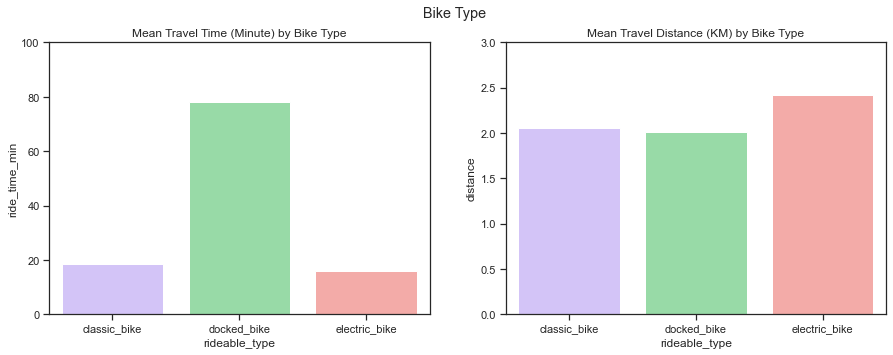

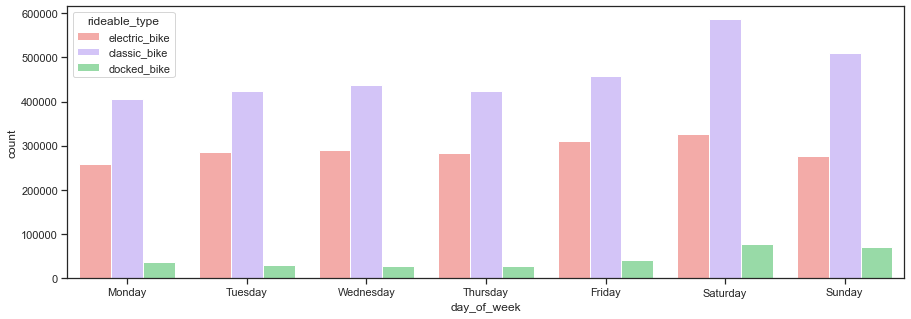

In [25]:
sns.set_palette("pastel")

df_rideable_type = df.groupby("rideable_type")["ride_time_min", "distance"].mean().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Bike Type")
sns.set_theme(style="ticks", palette="pastel")
sns.barplot(ax=axes[0], x=df_rideable_type["rideable_type"], 
             y=df_rideable_type["ride_time_min"],
           palette=["m", "g", "r"])
axes[0].set_title("Mean Travel Time (Minute) by Bike Type")
sns.barplot(ax=axes[1], x=df_rideable_type["rideable_type"], 
             y=df_rideable_type["distance"],
           palette=["m", "g", "r"])
axes[1].set_title("Mean Travel Distance (KM) by Bike Type")
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0,3)
fig.show();

#Number of rides by bike type during the week
plt.figure(figsize=(15,5))
sns.set_theme(style="ticks", palette="pastel")
sns.countplot(x=df["day_of_week"], hue=df["rideable_type"],
             order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
             palette=["r", "m", "g"])
fig.show()

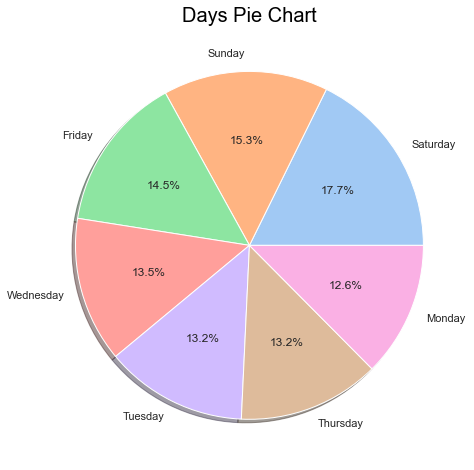

In [19]:
plt.figure(figsize=(8,8))

plt.pie(df["day_of_week"].value_counts().values,
       labels=df["day_of_week"].value_counts().index,
       autopct="%1.1f%%",
       shadow=True)
plt.title("Days Pie Chart", color="Black", fontsize=20)
plt.show()

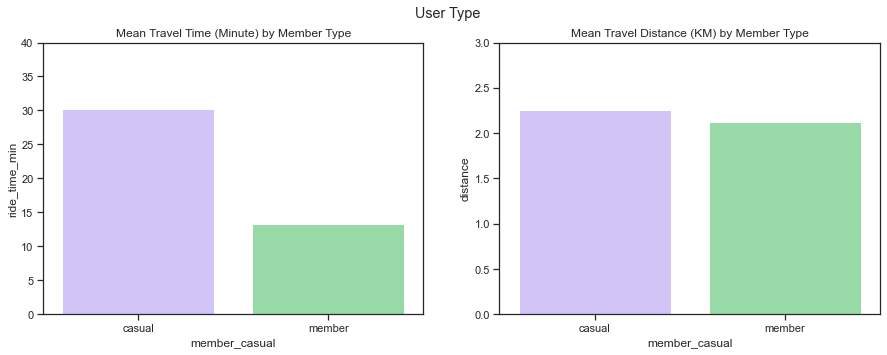

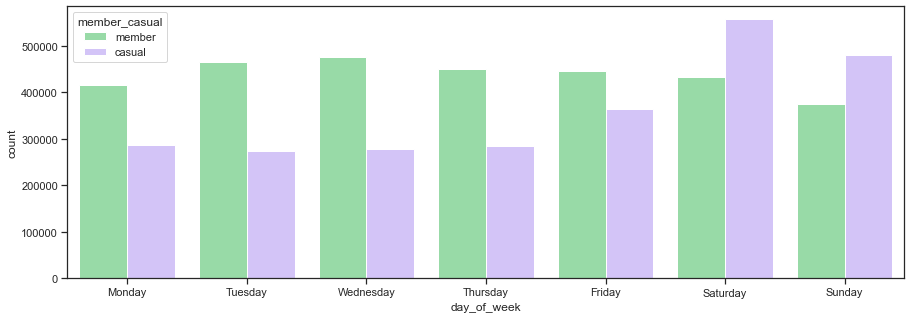

In [20]:
df_member_casual = df.groupby("member_casual")["ride_time_min", "distance"].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("User Type")
sns.set_theme(style="ticks", palette="pastel")
sns.barplot(ax=axes[0], x=df_member_casual["member_casual"], 
             y=df_member_casual["ride_time_min"],
           palette=["m", "g"])
axes[0].set_title("Mean Travel Time (Minute) by Member Type")
sns.barplot(ax=axes[1], x=df_member_casual["member_casual"], 
             y=df_member_casual["distance"],
           palette=["m", "g"])
axes[1].set_title("Mean Travel Distance (KM) by Member Type")
axes[0].set_ylim(0, 40)
axes[1].set_ylim(0,3)
fig.show();

plt.figure(figsize=(15,5))
sns.set_theme(style="ticks", palette="pastel")
sns.countplot(x=df["day_of_week"], hue=df["member_casual"],
             order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
           palette=["g", "m"])
fig.show()


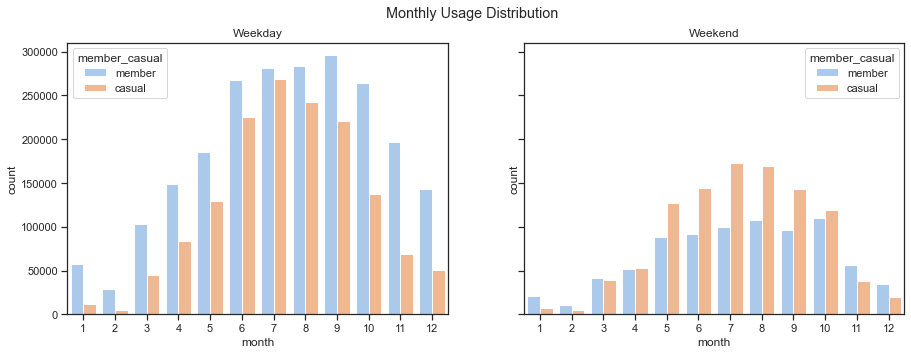

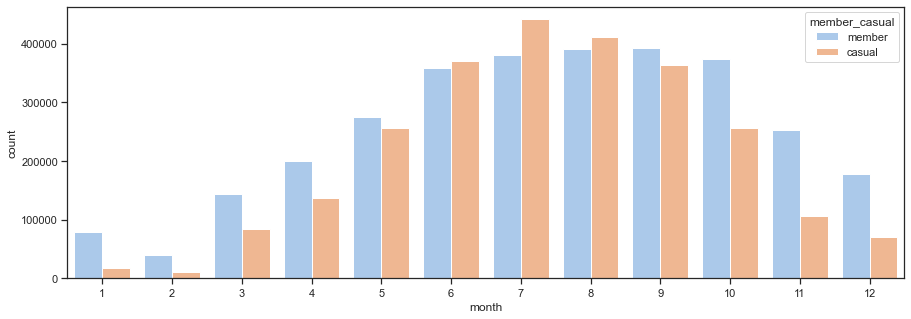

In [21]:
df_weekend=df[(df["day_of_week"]=="Saturday") | (df["day_of_week"]=="Sunday")]
df_weekday=df[(df["day_of_week"]!="Saturday") & (df["day_of_week"]!="Sunday")]

fig,axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("Monthly Usage Distribution")
sns.countplot(ax=axes[0],
              x="month",
             hue="member_casual",
             data=df_weekday)
axes[0].set_title("Weekday")


sns.countplot(ax=axes[1],
              x="month",
             hue="member_casual",
             data=df_weekend)
axes[1].set_title("Weekend")

fig.show();

plt.figure(figsize=(15,5))
sns.countplot(x="month",
             hue="member_casual",
             data=df)
fig.show()

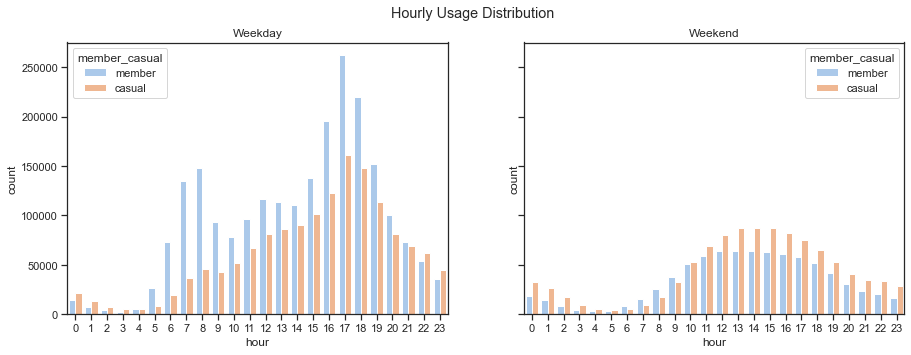

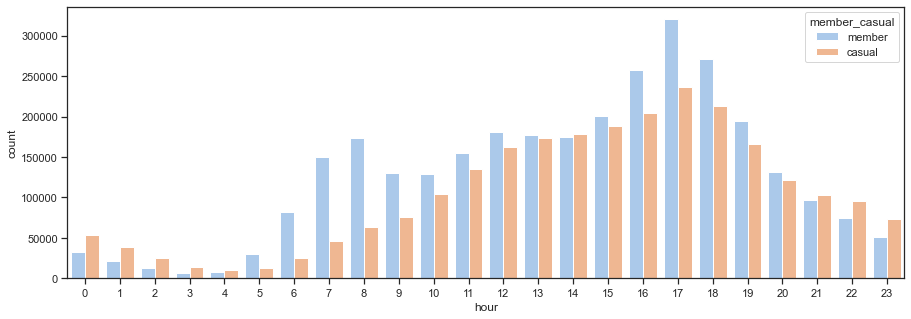

In [22]:
fig,axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("Hourly Usage Distribution")
sns.countplot(ax=axes[0],
              x="hour",
             hue="member_casual",
             data=df_weekday)
axes[0].set_title("Weekday")


sns.countplot(ax=axes[1],
              x="hour",
             hue="member_casual",
             data=df_weekend)
axes[1].set_title("Weekend")

fig.show();

plt.figure(figsize=(15,5))
sns.countplot(x="hour",
             hue="member_casual",
             data=df)
fig.show()

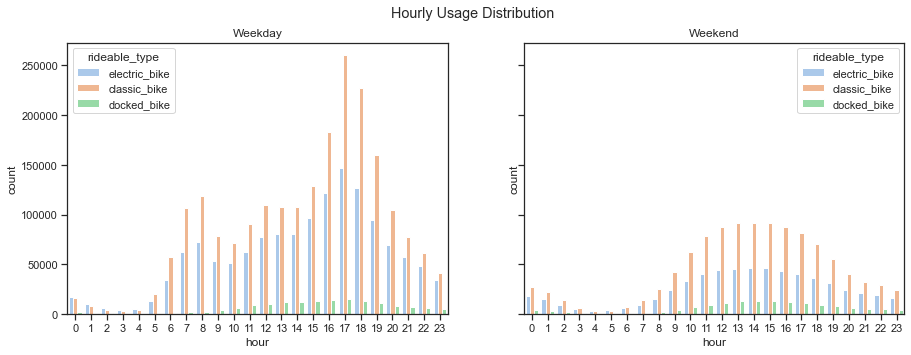

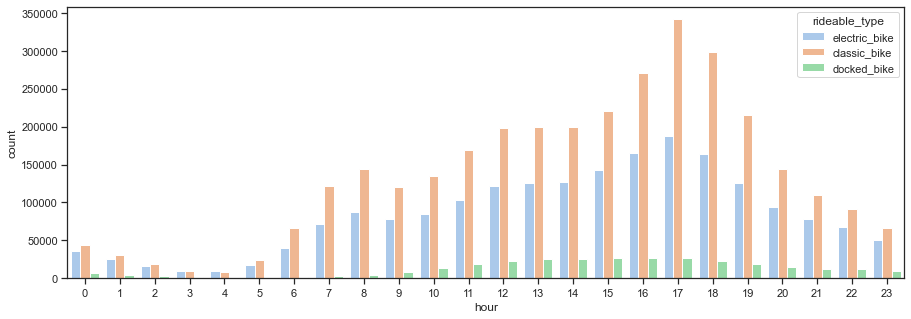

In [23]:
fig,axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("Hourly Usage Distribution")
sns.countplot(ax=axes[0],
              x="hour",
             hue="rideable_type",
             data=df_weekday)
axes[0].set_title("Weekday")


sns.countplot(ax=axes[1],
              x="hour",
             hue="rideable_type",
             data=df_weekend)
axes[1].set_title("Weekend")

fig.show();

plt.figure(figsize=(15,5))
sns.countplot(x="hour",
             hue="rideable_type",
             data=df)
fig.show()

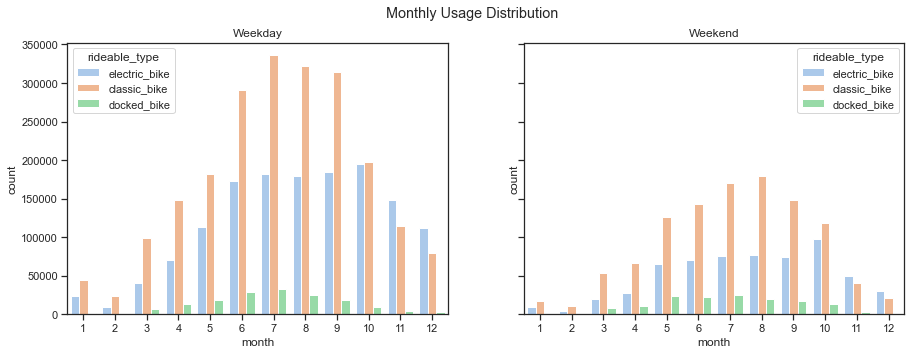

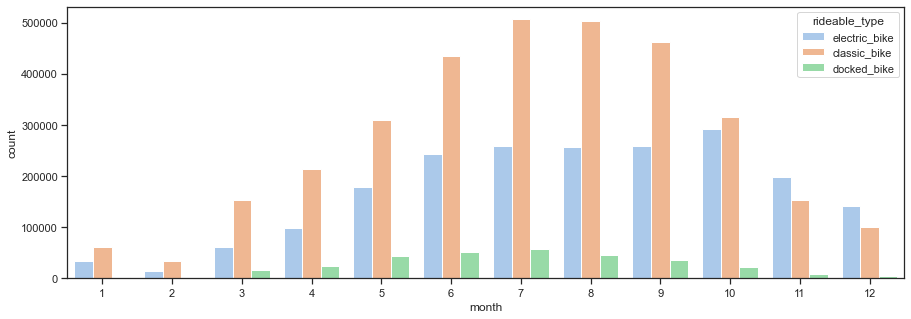

In [24]:
fig,axes= plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle("Monthly Usage Distribution")
sns.countplot(ax=axes[0],
              x="month",
             hue="rideable_type",
             data=df_weekday)
axes[0].set_title("Weekday")


sns.countplot(ax=axes[1],
              x="month",
             hue="rideable_type",
             data=df_weekend)
axes[1].set_title("Weekend")

fig.show();

plt.figure(figsize=(15,5))
sns.countplot(x="month",
             hue="rideable_type",
             data=df)
fig.show()